# 1. Setup

### This dataset predicts the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

### https://archive.ics.uci.edu/dataset/162/forest+fires

In [309]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('forestfires.csv')

# Display the first 5 rows of the DataFrame
print(data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [313]:
#construct an evaluation set of 5 datapoints with at least 3 predictors by defining a dictionary with random predictor data
valuation_data = {
    'ISI': [5.1, 6.7, 9, 9.6, 14.7],
    'RH': [51, 33, 97, 99, 29],
    'rain': [0, 0, 0.2, 0, 0],
    'temp': [8.2, 18, 8.3, 11.4, 22.2],
    'wind': [6.7, 0.9, 4, 1.8, 5.4]
}


# 2. Simple Linear Regression

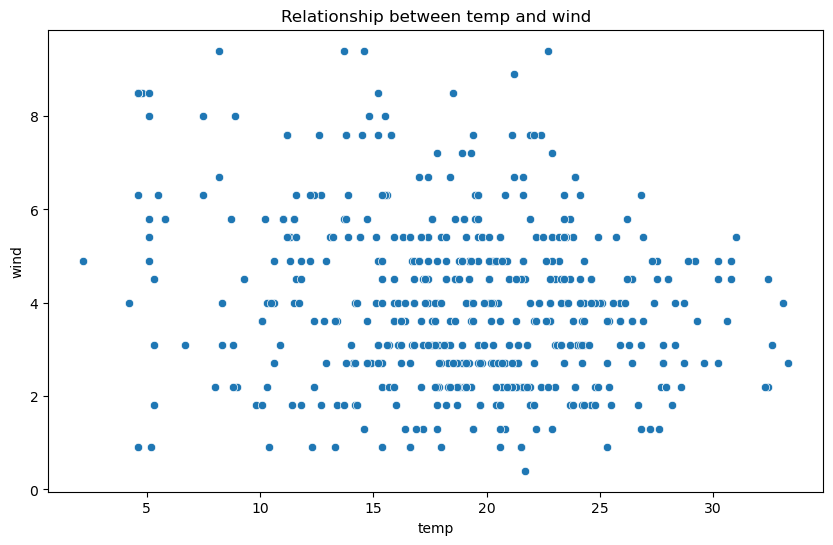

In [315]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading the dataset with pandas
data = pd.read_csv('forestfires.csv')

# Simple linear regression using 'temp' as predictor and 'wind %' as response
X = data['temp']
y = data['wind']

# Plotting the data
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='wind', data=data)
plt.title('Relationship between temp and wind')
plt.show()


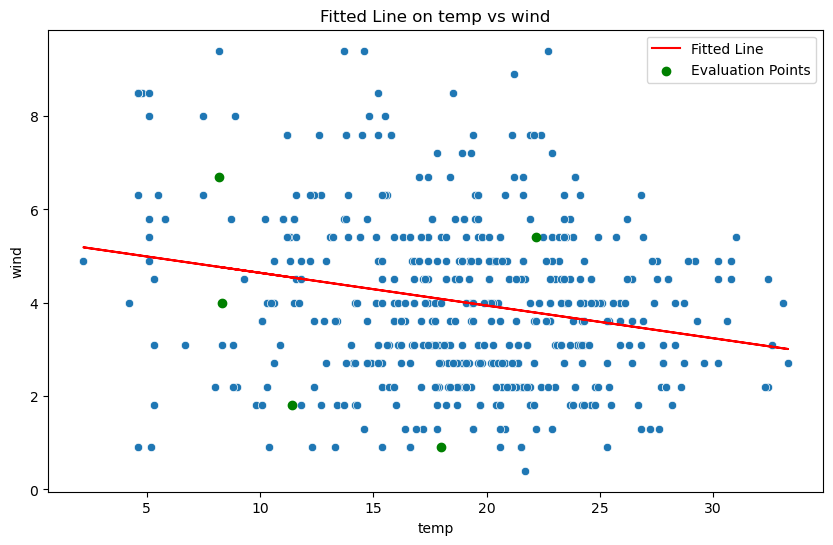

Intercept, beta_0: 5.34
Slope, beta_1: -0.07


In [317]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Separate predictor and response variables
X = data['temp']
y = data['wind']

# Add a constant to predictor for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# Least squares coefficients
beta_1 = model.params['temp']
beta_0 = model.params['const']

# Evaluation points
eval_points = {'temp': [8.2, 18, 8.3, 11.4, 22.2],
               'wind': [6.7, 0.9, 4, 1.8, 5.4]}
eval_data = pd.DataFrame(eval_points)

# Add a constant to predictor for intercept
X_eval = sm.add_constant(eval_data['temp'])

# Predict the wind values for the evaluation set
wind_pred = model.predict(X_eval)

# Plotting the fitted line and evaluation points
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['temp'], y=data['wind'])
plt.plot(data['temp'], beta_0 + beta_1 * data['temp'], color='red', label="Fitted Line")
plt.scatter(eval_data['temp'], eval_data['wind'], color='green', label="Evaluation Points")

plt.title('Fitted Line on temp vs wind')
plt.legend()
plt.show()

print(f"Intercept, beta_0: {beta_0:.2f}")
print(f"Slope, beta_1: {beta_1:.2f}")





In [319]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.01
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.79e-07
Time:                        22:31:57   Log-Likelihood:                -1020.9
No. Observations:                 517   AIC:                             2046.
Df Residuals:                     515   BIC:                             2054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3413      0.262     20.414      0.0


The R-squared value is 0.052, which means that approximately 5.2% of the variability in the dependent variable wind is explained by the independent variables in the mode



In [336]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('forestfires.csv')

# Separate predictor and response variables
X = data['temp']
y = data['wind']

# Add a constant to the predictor for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the coefficients
beta_0 = model.params['const']
beta_1 = model.params['temp']

# Print the equation
print(f"Equation: wind = {beta_0:.4f} + {beta_1:.4f} * temp")


Equation: wind = 5.3413 + -0.0701 * temp


# 3. Multicollinearity

array([[<Axes: xlabel='ISI', ylabel='ISI'>,
        <Axes: xlabel='RH', ylabel='ISI'>,
        <Axes: xlabel='rain', ylabel='ISI'>,
        <Axes: xlabel='temp', ylabel='ISI'>,
        <Axes: xlabel='wind', ylabel='ISI'>],
       [<Axes: xlabel='ISI', ylabel='RH'>,
        <Axes: xlabel='RH', ylabel='RH'>,
        <Axes: xlabel='rain', ylabel='RH'>,
        <Axes: xlabel='temp', ylabel='RH'>,
        <Axes: xlabel='wind', ylabel='RH'>],
       [<Axes: xlabel='ISI', ylabel='rain'>,
        <Axes: xlabel='RH', ylabel='rain'>,
        <Axes: xlabel='rain', ylabel='rain'>,
        <Axes: xlabel='temp', ylabel='rain'>,
        <Axes: xlabel='wind', ylabel='rain'>],
       [<Axes: xlabel='ISI', ylabel='temp'>,
        <Axes: xlabel='RH', ylabel='temp'>,
        <Axes: xlabel='rain', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='wind', ylabel='temp'>],
       [<Axes: xlabel='ISI', ylabel='wind'>,
        <Axes: xlabel='RH', ylabel='wind'>,
        <Axes:

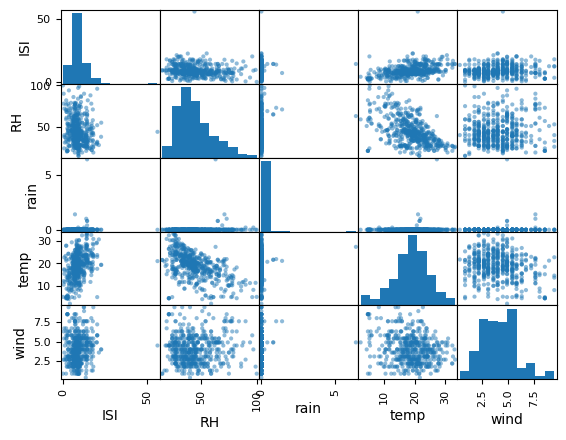

In [328]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats.outliers_influence as inf

data = pd.read_csv('forestfires.csv') # Loading the dataset with pandas
selected_predictors = ['ISI', 'RH', 'rain', 'temp', 'wind']

# Create a subset of the dataset with selected predictors and target variable
subset = data[selected_predictors]
pd.plotting.scatter_matrix(X)


In [330]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
data = pd.read_csv('forestfires.csv') # Loading the dataset with pandas
X = pd.DataFrame(data[['ISI', 'RH','rain','temp','wind']]) #select some predictors
for i in range(X.shape[1]):
    vif = inf.variance_inflation_factor(X.values, i) # Compute VIF
    print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")

VIF for ISI: 	     6.172
VIF for RH: 	     4.907
VIF for rain: 	     1.011
VIF for temp: 	     7.020
VIF for wind: 	     5.180


### ISI, temp, and wind might have high multicollinearity

# Multiple Linear Regression

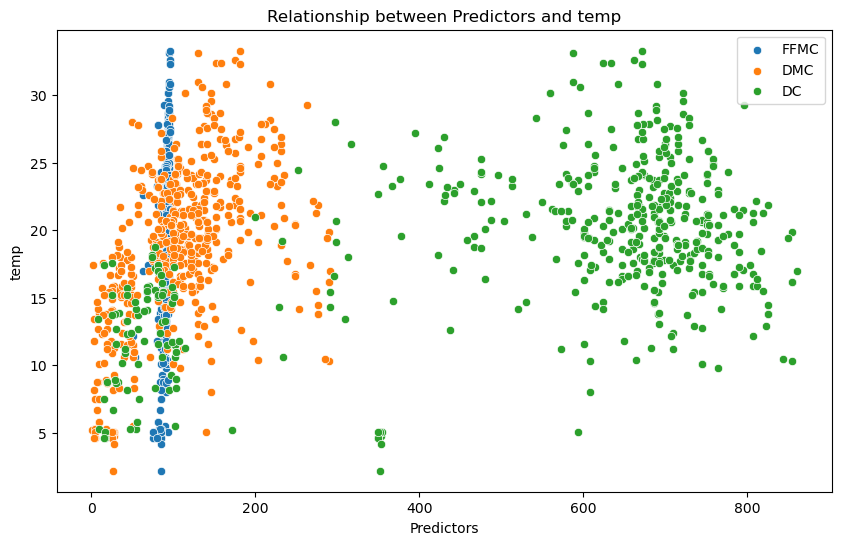

In [325]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset into a pandas DataFrame
data = pd.read_csv('forestfires.csv')

# Selecting the predictors
predictors = ['FFMC', 'DMC', 'DC']

# Plotting the data
plt.figure(figsize=(10, 6))
for predictor in predictors:
    sns.scatterplot(x=predictor, y='temp', data=data, label=predictor)

plt.title('Relationship between Predictors and temp')
plt.xlabel('Predictors')
plt.ylabel('temp')
plt.legend()
plt.show()


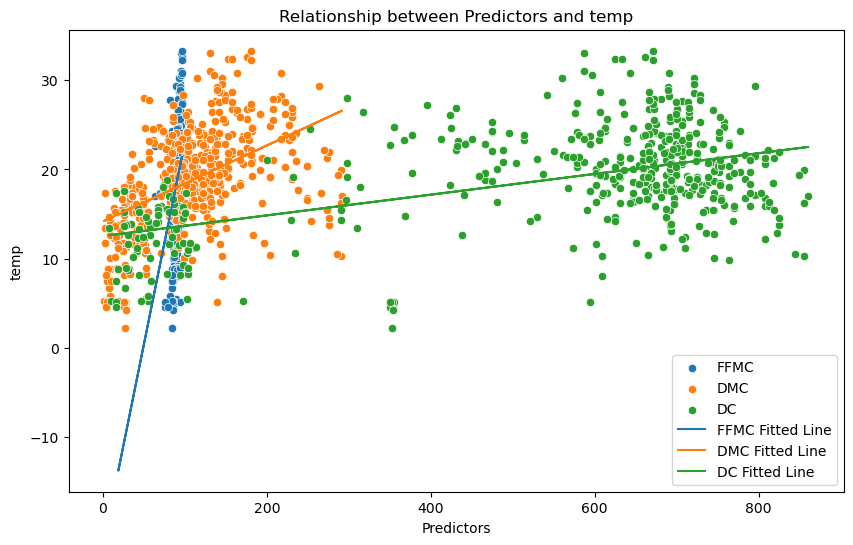

In [158]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
data = pd.read_csv('forestfires.csv')

# Selecting the predictors
predictors = ['FFMC', 'DMC', 'DC']

# Fit a linear regression model with the new predictors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FFMC', y='temp', data=data, label='FFMC')
sns.scatterplot(x='DMC', y='temp', data=data, label='DMC')
sns.scatterplot(x='DC', y='temp', data=data, label='DC')

for predictor in predictors:
    X = sm.add_constant(data[predictor])
    y = data['temp']
    model = sm.OLS(y, X).fit()
    beta_1 = model.params[predictor]
    beta_0 = model.params['const']
    plt.plot(data[predictor], beta_0 + beta_1 * data[predictor], label=f'{predictor} Fitted Line')

plt.title('Relationship between Predictors and temp')
plt.xlabel('Predictors')
plt.ylabel('temp')
plt.legend()
plt.show()



In [332]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wind   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.01
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.79e-07
Time:                        22:33:38   Log-Likelihood:                -1020.9
No. Observations:                 517   AIC:                             2046.
Df Residuals:                     515   BIC:                             2054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3413      0.262     20.414      0.0

 R^2 for the multiple linear regression model is 0.246 meaning that the predictors (DC in this case) explain about 24.6% of the variance in the target variable (temp). This value is higher than the R-squared value for the simple linear regression model showing that the multiple regression model provides a better fit to the data


In [338]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset into a pandas DataFrame
data = pd.read_csv('forestfires.csv')

# Selecting the predictors
predictors = ['FFMC', 'DMC', 'DC']

# Fit a linear regression model with the new predictors
X = sm.add_constant(data[predictors])
y = data['temp']
model = sm.OLS(y, X).fit()

# Get the coefficients
coefficients = model.params
intercept = coefficients['const']

# Write the equation for the model
equation = f"temp = {intercept:.2f} "
for predictor in predictors:
    coefficient = coefficients[predictor]
    equation += f"+ {coefficient:.2f} * {predictor} "

print("Equation for the model:")
print(equation)

Equation for the model:
temp = -12.39 + 0.29 * FFMC + 0.02 * DMC + 0.01 * DC 


In [172]:
# Define the evaluation set
evaluation_set = {'FFMC': [88.2, 90.6, 91.7, 89.3, 92.3],
                  'DMC': [26.2, 35.4, 33.3, 51.3, 85.3],
                  'DC': [94.3, 669.1, 77.5, 102.2, 488]}

# Predict the target values for the evaluation set
predicted_temps = []
for i in range(len(evaluation_set['FFMC'])):
    temp = (-12.39) + (0.29 * evaluation_set['FFMC'][i]) + (0.02 * evaluation_set['DMC'][i]) + (0.01 * evaluation_set['DC'][i])
    predicted_temps.append(temp)

# Print the predicted target values
print("Predicted target values for the evaluation set:")
print(predicted_temps)


Predicted target values for the evaluation set:
[14.655, 21.282999999999998, 15.644, 15.554999999999998, 20.962999999999994]
